In [1]:
import numpy as np
import networkx as nx
# collections module: https://docs.python.org/3/library/collections.html
import collections
import matplotlib.pyplot as plt

# Random Graphs

## Degree 

### Undirected Graph

The degree of a node in an undirected graph is the number of edges connected to it.

### Example of Undirected Graph

In [2]:
# Vertices (or Nodes) of a graph
V = ['A', 'B', 'C', 'D']
# Edges (or Links) of a graph
E = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'A'), ('D', 'A'), ('D', 'B'), ('D', 'C')]

In [3]:
# Initialize a graph
G = nx.Graph()

In [4]:
G.add_nodes_from(V)
G.add_edges_from(E)

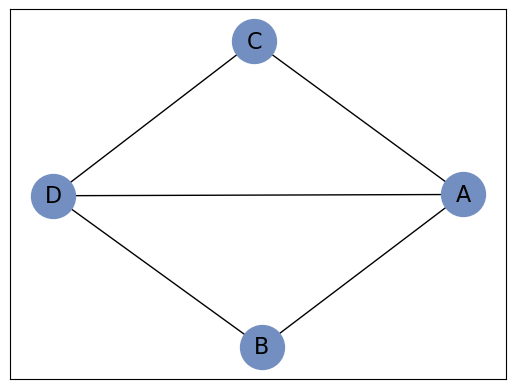

In [5]:
nx.draw_networkx(G, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', arrowsize = 33, font_size = 16)

`G.degree()` is used to find the degree of each node of a graph

In [6]:
# Degree of node A
print(G.degree['A'])

3


In [7]:
# Degree of node B
print(G.degree['B'])

2


In [8]:
# Degree of node B
print(G.degree['C'])

2


In [9]:
# Degree of node B
print(G.degree['D'])

3


### Directed Graph

The degree of a node in a directed graph can be further classified into the in-degree and out-degree. 

- In-degree is the number of ingoing edges connected to a node. 

- Out-degree is the number of outgoing edges.

### Example of Directed Graph

In [10]:
# Initialize a graph
Gd = nx.DiGraph()

In [11]:
Gd.add_nodes_from(V)
Gd.add_edges_from(E)

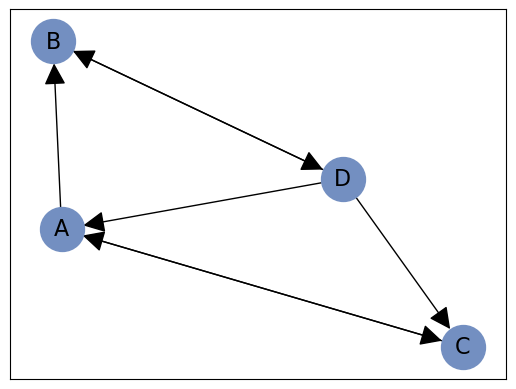

In [12]:
nx.draw_networkx(Gd, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', arrowsize = 33, font_size = 16)

In [13]:
# In-degree of Node A
print(Gd.in_degree('A'))

2


In [14]:
# Out-degree of Node A
print(Gd.out_degree('A'))

2


In [15]:
# In-degree of Node B
print(Gd.in_degree('B'))

2


In [16]:
# Out-degree of Node B
print(Gd.out_degree('B'))

1


In [17]:
# In-degree of Node C
print(Gd.in_degree('C'))

2


In [18]:
# Out-degree of Node C
print(Gd.out_degree('C') )

1


In [19]:
# In-degree of Node D
print(Gd.in_degree('D'))

1


In [20]:
# Out-degree of Node D
print(Gd.out_degree('D'))

3


### Degree Distribution

The degree distribution represents the frequency of each possible degree, indicating how often each degree occurs as a proportion of the total number of nodes.

If we let $\text{freq} (k)$ denote the frequency of degree $k$,

\begin{align*}
\text{freq}(k) = \frac{n(k)}{N}
\end{align*}

\begin{align*}
n(k) &\text{ represents the number of times degree } k \text{ appears in the degree vector,} \\
N &\text{ represents the total number of nodes.}
\end{align*}

and

\begin{align*}
\sum_{i=1}^{n} \text{freq}(k_{i}) = 1
\end{align*}

Let's refer to the undirected graph example:

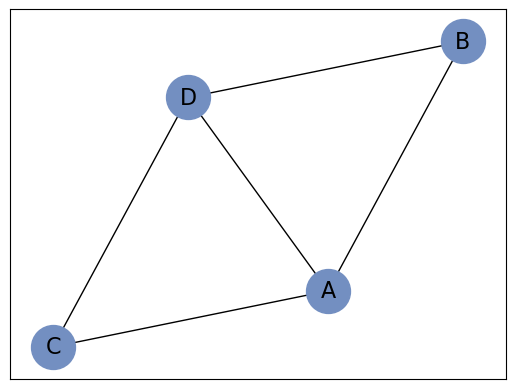

In [21]:
nx.draw_networkx(G, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', arrowsize = 33, font_size = 16)

Degree of this graph can be organized in to a list

In [22]:
# deg_list stores the degree of each node
deg_list = [G.degree['A'], G.degree['B'], G.degree['C'], G.degree['D']]
print(deg_list)

[3, 2, 2, 3]


In [23]:
# Counter function in collections module count the frequency of the item in the list
counter = collections.Counter(deg_list)
counter

Counter({3: 2, 2: 2})

In [24]:
(counter[2]/4) + (counter[3]/4) == 1

True

To see the degree distribution for a particular graph, we can plot  $\text{freq} (k)$ on the vertical axis versus $k$ on the horizontal axis. For large graphs, it is better to plot a histogram of the degrees: instead
of calculating freq(𝑘) for each possible 𝑘, we divide the horizontal axis into bins and count the number
of degrees that fall into each bin. For small graphs, we can always choose each bin to contain a single degree, and we end up back with a plot of $\text{freq} (k)$ versus $k$.

### Expected Degree Distribution

\begin{align*}
P(k) = \text{average value of } \text{freq}(k) \text{ over lots of randomly generated graphs.}
\end{align*}

This function $P$ is the expected degree distribution for a random graph generator. In practice, we can compare the
expected degree distribution of a graph generation method with that of empirical data to help determine
how well the method fits real-world graphs (such as the Facebook “friend” graph).

## Erdős-Rényi random graphs

The Erdős-Rényi method for generating random graphs utilizes a probability parameter 𝑝 given by

\begin{align*}
p = \frac{\mu}{N - 1}
\end{align*}

\begin{align*}
N  = &\text{ the total number of nodes in the graph} \\
\mu =  &\text{ the desired average degree}
\end{align*}

The expected degree distribution of Erdős-Rényi model is given by the binomial formula:

\begin{align*}
P (k) = \binom{N-1}{k} p^{k} (1-p)^{(N-1-k)}
\end{align*}

In **NetworkX**,  `nx.gnp_random_graph`, `nx.erdos_renyi_graph`, and  `nx.binomial_graph` are equivalent, so either way will generate a random graph based on Erdős-Rényi model

In [25]:
# Generate a graph based on Erdős-Rényi model
Ger = nx.erdos_renyi_graph(5, 0.6)

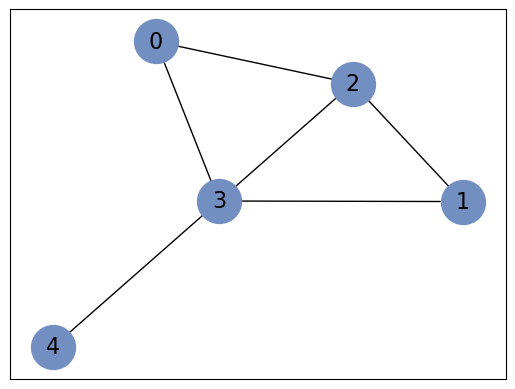

In [26]:
# Visualize the graph
nx.draw_networkx(Ger, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', font_size = 16)

### Degree Distribution

In [29]:
# Generate the degree sequence of Ger
Ger_degree_sequence = sorted((d for n, d in Ger.degree()), reverse=True)

In [30]:
print(Ger_degree_sequence)

[4, 3, 2, 2, 1]


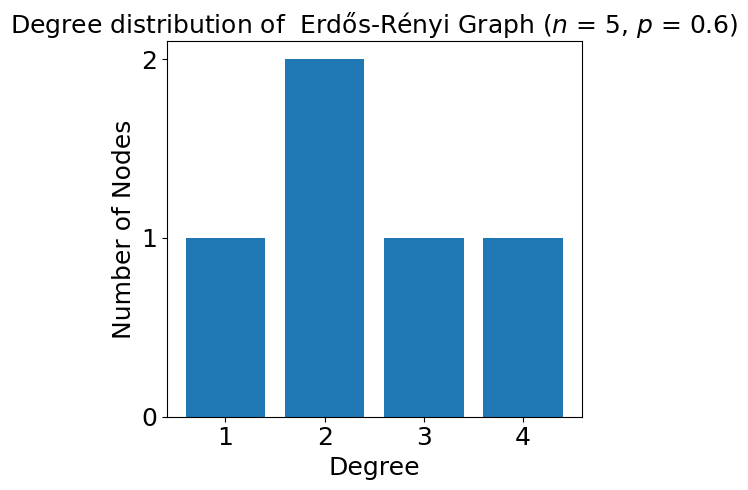

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
# Generate the degree distribution
degrees, counts = np.unique(Ger_degree_sequence, return_counts=True)
# Create a bar plot for the degree distribution
ax.bar(degrees, counts)
ax.set_title("Degree distribution of  Erdős-Rényi Graph ($n$ = 5, $p$ = 0.6)", fontsize = 18)
ax.set_xlabel("Degree", fontsize = 18)
ax.set_ylabel("Number of Nodes", fontsize = 18)
# Set integers from min to max degrees
ax.set_xticks(np.arange(min(degrees), max(degrees) + 1, 1))  
# Set integers from 0 to max counts
ax.set_yticks(np.arange(0, max(counts) + 1, 1))  
# Customize ticker size
ax.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()  
plt.show()

In [27]:
# Generate another graph with different probability based on Erdős-Rényi model
Ger_1 = nx.erdos_renyi_graph(5, 0.3)

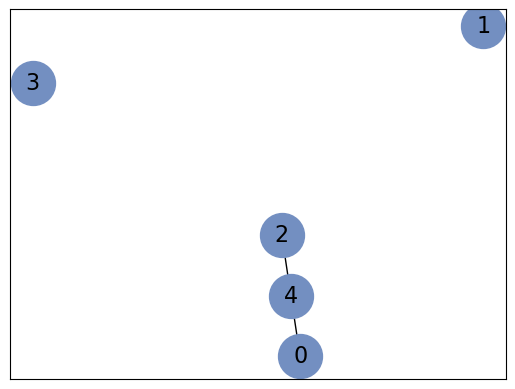

In [28]:
# Visualize the graph
nx.draw_networkx(Ger_1, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', font_size = 16)

In [32]:
# Generate the degree sequence of Ger_1
Ger_1_degree_sequence = sorted((d for n, d in Ger_1.degree()), reverse=True)

In [33]:
print(Ger_1_degree_sequence)

[2, 1, 1, 0, 0]


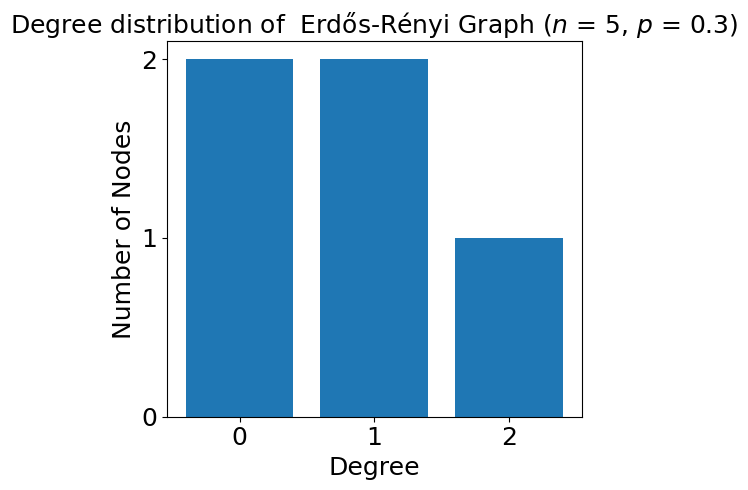

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
# Generate the degree distribution
degrees, counts = np.unique(Ger_1_degree_sequence, return_counts=True)
# Create a bar plot for the degree distribution
ax.bar(degrees, counts)
ax.set_title("Degree distribution of  Erdős-Rényi Graph ($n$ = 5, $p$ = 0.3)", fontsize = 18)
ax.set_xlabel("Degree", fontsize = 18)
ax.set_ylabel("Number of Nodes", fontsize = 18)
# Set integers from min to max degrees
ax.set_xticks(np.arange(min(degrees), max(degrees) + 1, 1))  
# Set integers from 0 to max counts
ax.set_yticks(np.arange(0, max(counts) + 1, 1))  
# Customize ticker size
ax.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()  
plt.show()

## Geometric random graphs

The geometric method for generating random graphs takes two parameters, the number of nodes $N$ in
the graph and the communication radius $R$. To create a random graph using this method, we first place
the $N$ nodes uniformly at random in some region (typically a unit square or a unit disk in the plane), and
then we add an edge between two nodes whenever they are within a distance $R$ of each other. We can use
this method to model an ad hoc wireless communication network: each node represents a handset, and
two handsets can communicate with each other when they are close enough together.

Clearly the average degree should be an increasing function of 𝑅: if you can communicate over a longer
distance then you will tend to have more neighbors. The problem of choosing $R$ to get a desired average
degree $\mu$ is complicated by the presence of the region boundary.

In [35]:
# Generate a geometric random graph 
Ggeo = nx.random_geometric_graph(5, 0.5)

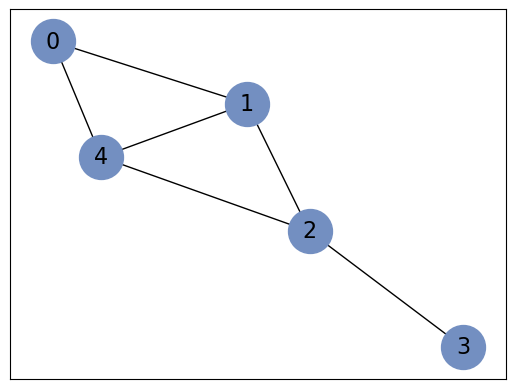

In [36]:
# Visualize the graph
nx.draw_networkx(Ggeo, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', font_size = 16)

### Degree Distribution

In [37]:
# Generate the degree sequence of Ger
Ggeo_degree_sequence = sorted((d for n, d in Ggeo.degree()), reverse=True)

In [38]:
print(Ggeo_degree_sequence)

[3, 3, 3, 2, 1]


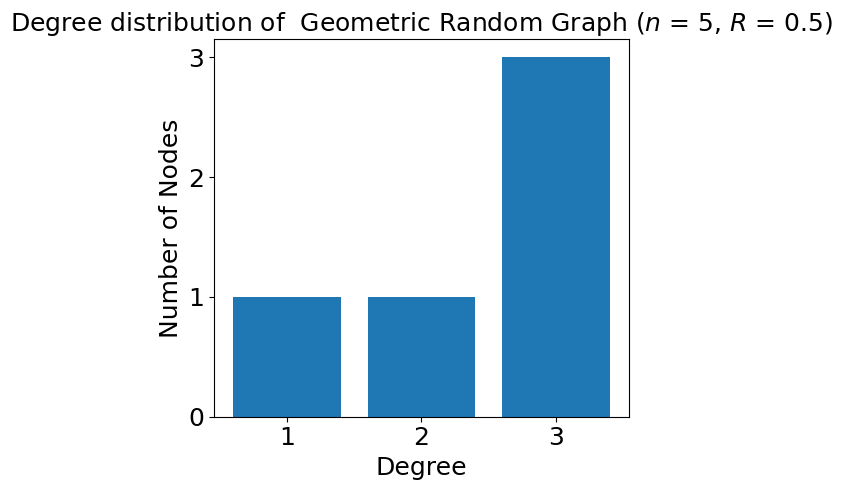

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
# Generate the degree distribution
degrees, counts = np.unique(Ggeo_degree_sequence, return_counts=True)
# Create a bar plot for the degree distribution
ax.bar(degrees, counts)
ax.set_title("Degree distribution of  Geometric Random Graph ($n$ = 5, $R$ = 0.5)", fontsize = 18)
ax.set_xlabel("Degree", fontsize = 18)
ax.set_ylabel("Number of Nodes", fontsize = 18)
# Set integers from min to max degrees
ax.set_xticks(np.arange(min(degrees), max(degrees) + 1, 1))  
# Set integers from 0 to max counts
ax.set_yticks(np.arange(0, max(counts) + 1, 1))  
# Customize ticker size
ax.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()  
plt.show()

In [40]:
# Generate a geometric random graph 
Ggeo_1 = nx.random_geometric_graph(5, 10)

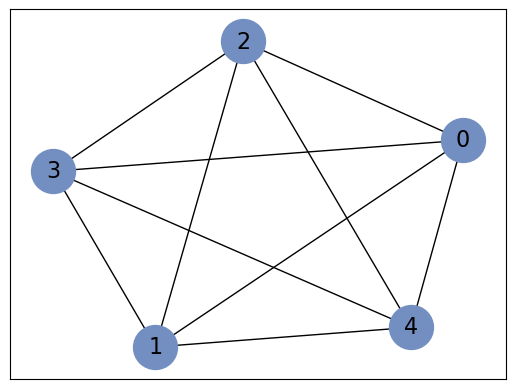

In [41]:
# Visualize the graph
nx.draw_networkx(Ggeo_1, with_labels = True, node_size = 1000, node_color = '#738FC1', edge_color = 'black', font_size = 16)

In [42]:
# Generate the degree sequence of Ger
Ggeo1_degree_sequence = sorted((d for n, d in Ggeo_1.degree()), reverse=True)

In [43]:
print(Ggeo1_degree_sequence)

[4, 4, 4, 4, 4]


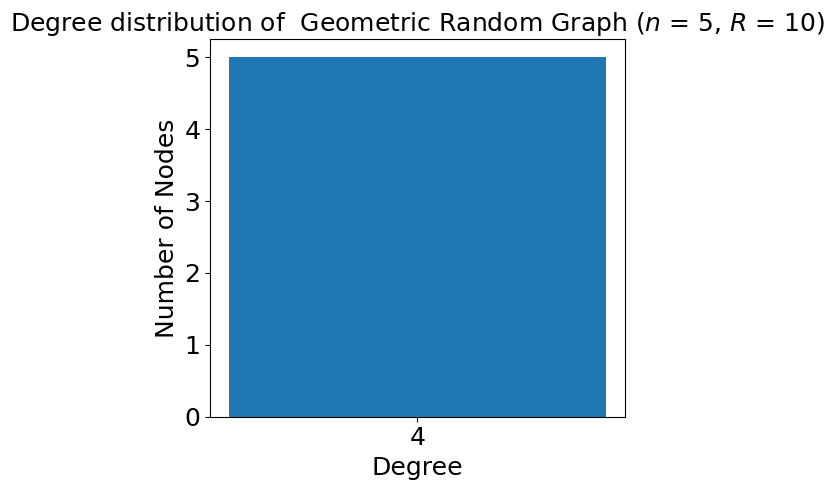

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
# Generate the degree distribution
degrees, counts = np.unique(Ggeo1_degree_sequence, return_counts=True)
# Create a bar plot for the degree distribution
ax.bar(degrees, counts)
ax.set_title("Degree distribution of  Geometric Random Graph ($n$ = 5, $R$ = 10)", fontsize = 18)
ax.set_xlabel("Degree", fontsize = 18)
ax.set_ylabel("Number of Nodes", fontsize = 18)
# Set integers from min to max degrees
ax.set_xticks(np.arange(min(degrees), max(degrees) + 1, 1))  
# Set integers from 0 to max counts
ax.set_yticks(np.arange(0, max(counts) + 1, 1))  
# Customize ticker size
ax.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()  
plt.show()

## Hyperbolic geometric random graphs

Similar to the geometric random graphs, we distributed 𝑁 nodes uniformly at random in a region and add an edge between two nodes whenever they are within a distance $R$ of each other. The twist here is that we don’t do this on the flat “Euclidean” plane, but rather on the hyperbolic plane which is a particular kind of “curved space.” Geometry on the hyperbolic plane follows all of the normal rules of Euclidean (or flat) geometry except for one: the so-called parallel postulate. 

In Euclidean geometry, the parallel postulate is equivalent to the statement that given a line and a point not on it, there is exactly one line parallel to the given line that passes through the point. In contrast, in hyperbolic geometry there are infinitely many different lines parallel to the given line that pass through the point. 

## References:

Frieze, A., & Karoński, M. (2024). [Introduction to random graphs. 